In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt

Function that returns the required dataset.

In [2]:
#Reading imported file in the Notebook
#Showing the first 5 col.

balance_data = pd.read_csv('heart(1).csv')
balance_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Separating the target variable 
X = balance_data.drop(columns=['target'])
Y = balance_data.target

In [4]:
# Splitting the dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1) 

create a decision tree classifier model and train using Gini

In [5]:
# perform training with giniIndex
# Creating the classifier object 
clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100)
# Fit the model 
clf_gini.fit(X_train, y_train) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

create a decision tree classifier model and train using Entropy

In [6]:
# perform training with entropy
# Decision tree with entropy 
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100)
# Fit the model  
clf_entropy.fit(X_train, y_train) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

This function will take the respective models and X_test as input and return the predicted values for each approach.

In [7]:
# Function to make predictions 
def prediction(X_test, clf_object):
    # Predicton on test with giniIndex 
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred 

function to calculate the accuracy of both the models.

In [8]:
# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred):
    print("Accuracy : ", accuracy_score(y_test,y_pred)*100)

Execute the above 2 functions to get the predicted values and accuracy of each model.

In [9]:
# Operational Phase 
print("Results Using Gini:")
# Prediction using gini 
y_pred_gini = prediction(X_test, clf_gini)
cal_accuracy(y_test, y_pred_gini)

print("Results Using Entropy:")
# Prediction using entropy 
y_pred_entropy = prediction(X_test, clf_entropy)
cal_accuracy(y_test, y_pred_entropy)

Results Using Gini:
Predicted values:
[0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1
 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0
 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1]
Accuracy :  72.52747252747253
Results Using Entropy:
Predicted values:
[0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0
 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0
 0 1 1 0 0 0 1 1 0 1 1 1 0 1 1 0 0]
Accuracy :  71.42857142857143


Most of the time both the models have similar accuracy. Sometimes it's different too.

Print the tree created by both the models and see which is the root node.

In [10]:
#Print tree
def printTree(classifier):
    feature_names = ['Chest Pain', 'Blood Circulation', 
                         'Blocked Arteries']
    target_names = ['HD-Yes', 'HD-No']
    
    #Build the tree
    dot_data = tree.export_graphviz(classifier,                                      
                         out_file=None,feature_names=feature_names,
                         class_names=target_names, filled = True)
    
    #Draw tree
    tr = graphviz.Source(dot_data, format ="png")
    return tr

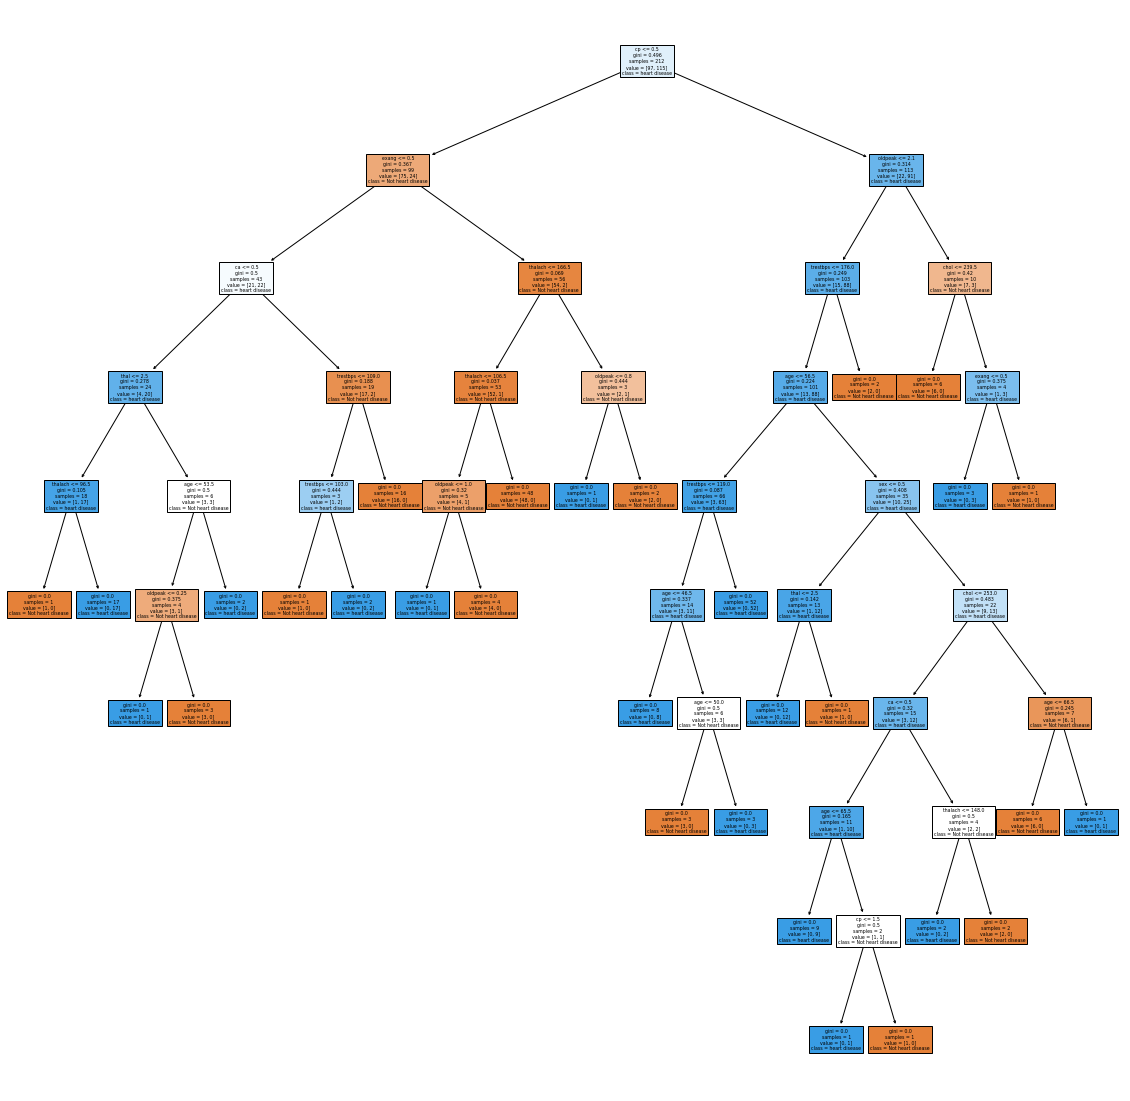

In [11]:
#Print gini tree
plt.figure(figsize=(20,20))
features = balance_data.columns
classes = ['Not heart disease','heart disease']
tree.plot_tree(clf_gini,feature_names=features,class_names=classes,filled=True)
plt.show()

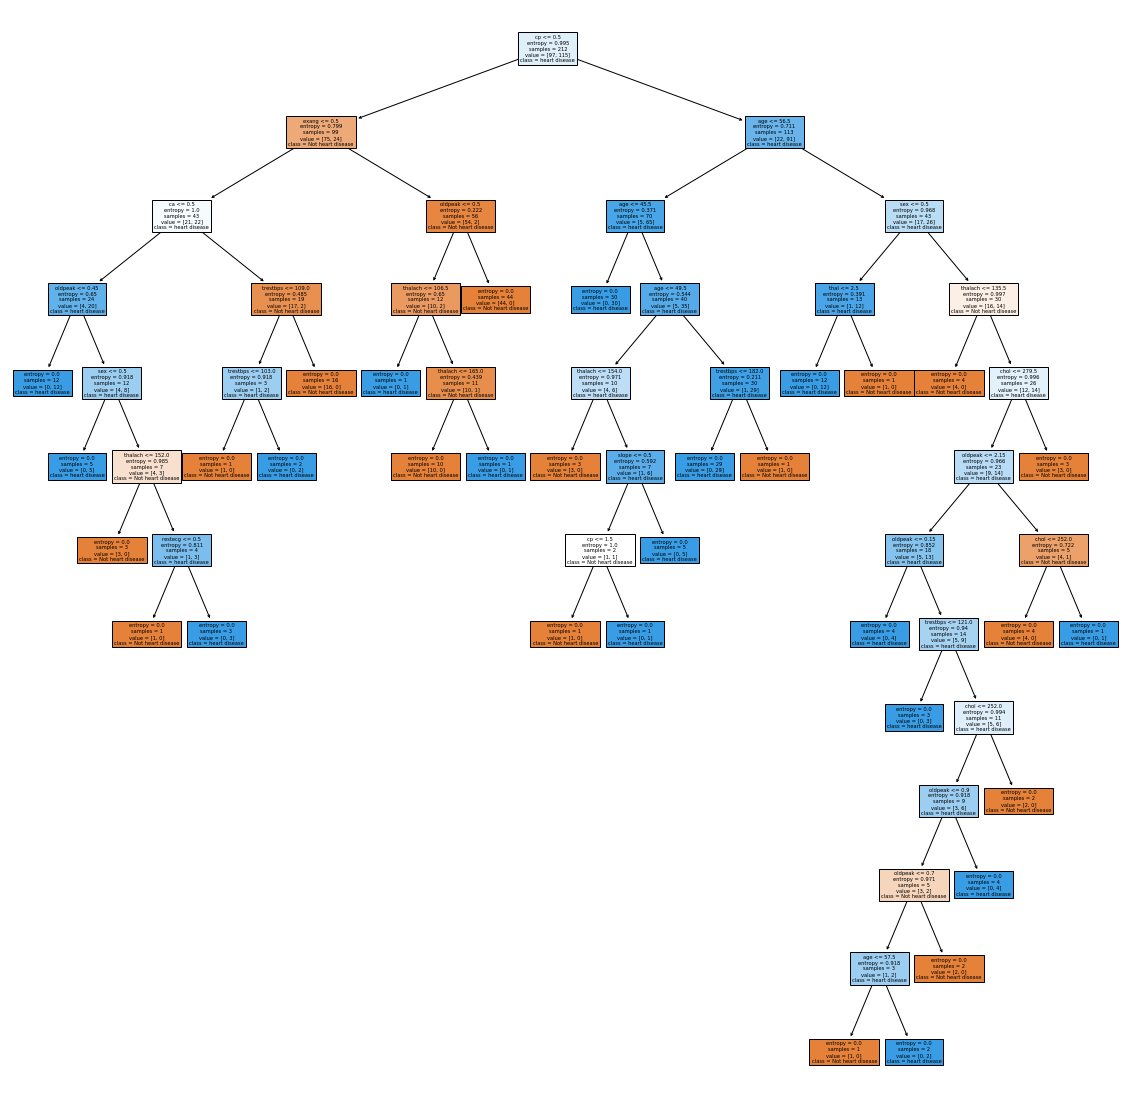

In [12]:
#Print entropy tree
plt.figure(figsize=(20,20))
features = balance_data.columns
classes = ['Not heart disease','heart disease']
tree.plot_tree(clf_entropy,feature_names=features,class_names=classes,filled=True)
plt.show()

#                                        Gini and Entropy 

- entropy :
it measures the randomness in the information being processed or we can say it measures the purity of the split. the higher the entropy the harder it is to draw any conclusions from that information . 

- Gini impurity :
is a measurement of the likelihood of an incorrect classification of a new instance of a random variable , if that new instance were randomly classified according to the distribution of class labels from the data set .  

From the above predictions of both the decision tree classifier models, we can see that " CP " is the root node indicating that "CP" is the main factor that impacts heart disease in a patient. 

The internal working of both methods is very similar and both are used for computing the feature/split after every new splitting. But if we compare both the methods then Gini Impurity is more efficient than entropy in terms of computing power and shorter period of excution time . 

The range of Entropy lies in between 0 to 1 and the range of Gini Impurity lies in between 0 to 0.5. Hence we can conclude that Gini Impurity is better as compared to entropy for selecting the best features. 

The predictions change according to the data and also the train_test_split percentage and even the bias and variance in data would have an impact. 

To increase the accuracy, we can split the dataset in to many small datasets and create models and again consolidate the results to get an optimum accuracy. 
